In [71]:
import sys
import numpy
import matplotlib
import pandas
import sklearn


# Uncomment the following lines to print what versions of each import we are using

# print("Python {}".format(sys.version))
# print("Numpy {}".format(numpy.__version__))
# print("Matplotliv {}".format(matplotlib.__version__))
# print("Pandas {}".format(pandas.__version__))
# print("SKLearn {}".format(sklearn.__version__))

In [3]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_validate, train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
# Load the Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id',
         'clump_thickness',
         'uniform_cell_size',
         'uniform_cell_shape',         
         'marginal_adhesion',
         'single_epithelial_size',
         'bare_nuclei',
         'bland_chromatin',
         'normal_nucleoli',
         'mitosis',
         'class'
        ]

# df is Data Frame
# Read the csv from Pandas(pd as defined above)
df = pd.read_csv(url, names = names)
print(df)

# 'id' column does not say anything about the dataiteself so it is okay to drop this 
df.drop(['id'], 1, inplace = True)

# Print the shape of the database
# Prints (699, 10) which means there are 699 rows and 10 columns.

print(df.shape)

# Data must always be cleaned(Pre-processings)
df.replace('?', -99999, inplace=True)
# df.axes prints the name of all the columns in the database
print(df.axes)


          id  clump_thickness  uniform_cell_size  uniform_cell_shape  \
0    1000025                5                  1                   1   
1    1002945                5                  4                   4   
2    1015425                3                  1                   1   
3    1016277                6                  8                   8   
4    1017023                4                  1                   1   
5    1017122                8                 10                  10   
6    1018099                1                  1                   1   
7    1018561                2                  1                   2   
8    1033078                2                  1                   1   
9    1033078                4                  2                   1   
10   1035283                1                  1                   1   
11   1036172                2                  1                   1   
12   1041801                5                  3                

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitosis                   1
class                     2
Name: 0, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.

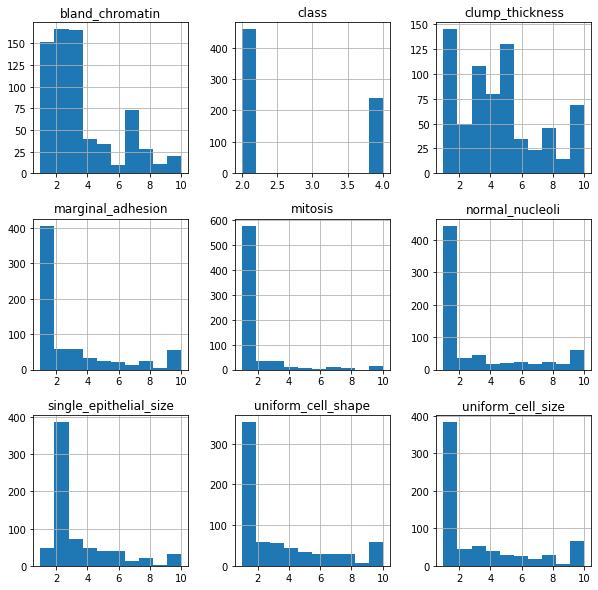

In [5]:
# Print individual row of data 
print(df.loc[0])

# Describe the data - Get count, mean, std deviation, percentages, max etc.
print(df.describe())

# Histograms for each data can be plotted
df.hist(figsize = (10,10))
plt.show()

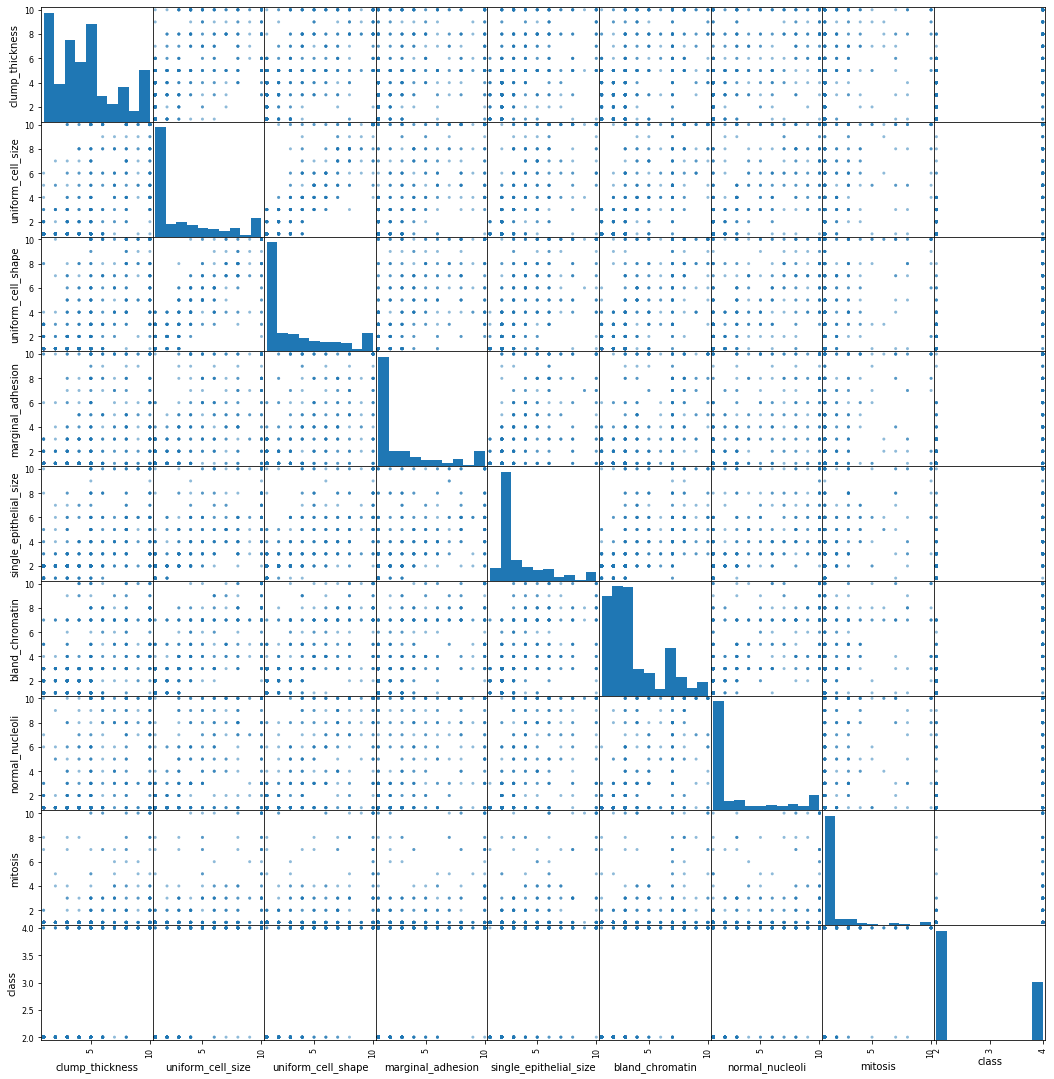

In [17]:
# Scatter plot
scatter_matrix(df, figsize =(18,19))
plt.show()

In [57]:
# Create X and Y datasets for Training

X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
# Specify testing options
seed = 8
scoring = 'accuracy'

In [59]:
# Define the mordels to train
models = []
models.append (('KNN', KNeighborsClassifier(n_neighbors = 5)))

# Use gamma='auto' so the the SVM deprecated "Warning - is handled"
# Using Python 3.7 causes the following Warning
# Warning is "The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features."

models.append(('SVM', SVC(gamma='auto')))
               
# Evaluate each model in turn
results = []
names = []

for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
               

KNN: 0.967695 (0.031027)
SVM: 0.960584 (0.037401)


In [56]:
# Make Predictions on validation dataset 

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))


KNN
0.9642857142857143
              precision    recall  f1-score   support

           2       0.98      0.97      0.97        95
           4       0.93      0.96      0.95        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

SVM
0.9714285714285714
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        95
           4       0.92      1.00      0.96        45

    accuracy                           0.97       140
   macro avg       0.96      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140



In [70]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,2]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.95
[2]
